===== APERÇU DU DATASET =====


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



===== MÉTADONNÉES =====
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven 

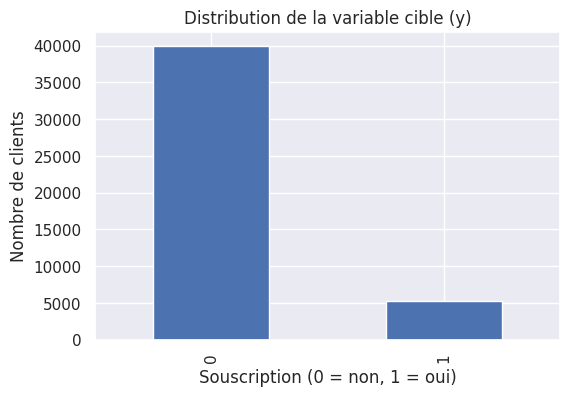

INTERPRÉTATION :

La variable cible est fortement déséquilibrée : la majorité des clients 
NE souscrivent pas au dépôt à terme. Cela montre qu’il faut probablement
utiliser des techniques comme le rééquilibrage (SMOTE) ou class_weight.



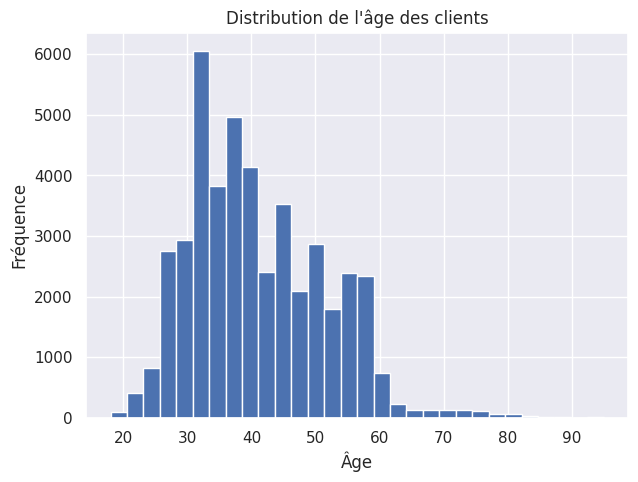

INTERPRÉTATION :

La majorité des clients ont entre 25 et 60 ans. La distribution est légèrement 
asymétrique vers la droite (présence de clients plus âgés). 
Cela peut influencer la segmentation marketing.



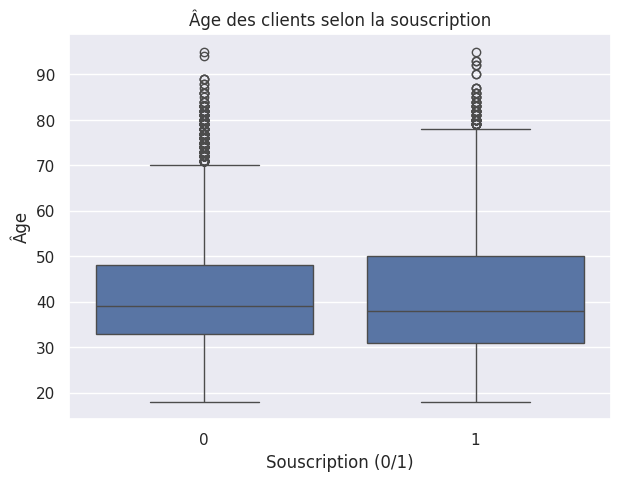

INTERPRÉTATION :

Ce boxplot montre les différences d’âge entre les clients qui souscrivent et 
ceux qui ne souscrivent pas. Souvent, les personnes plus âgées ont un comportement 
financier plus stable et peuvent être plus susceptibles de souscrire.



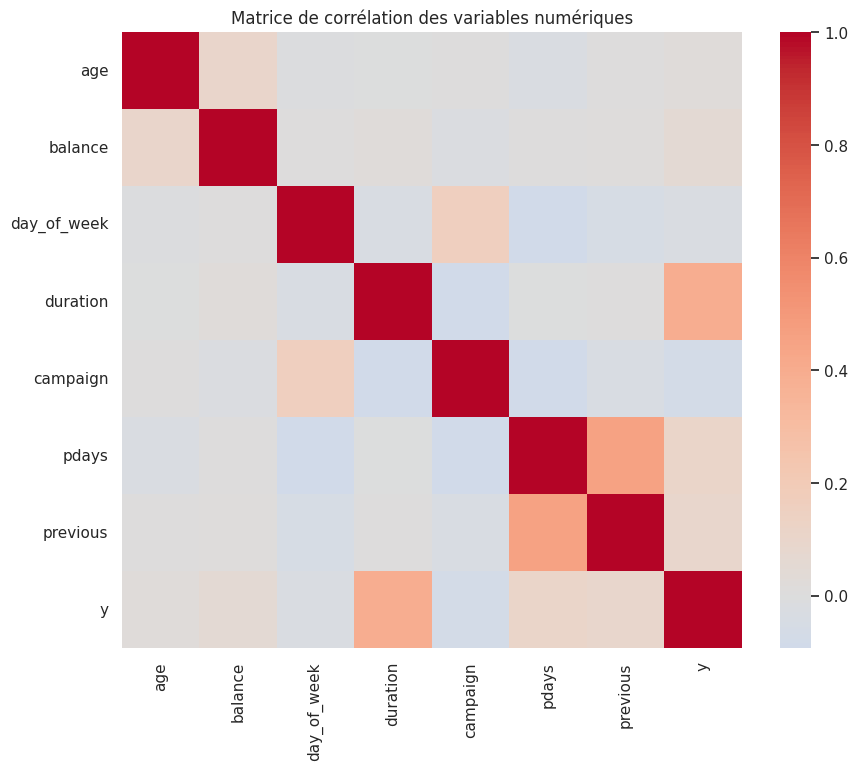

INTERPRÉTATION :

La heatmap montre les relations linéaires entre les variables numériques. 
Dans Bank Marketing, la corrélation est généralement faible, ce qui 
signifie que les variables ne sont pas redondantes.



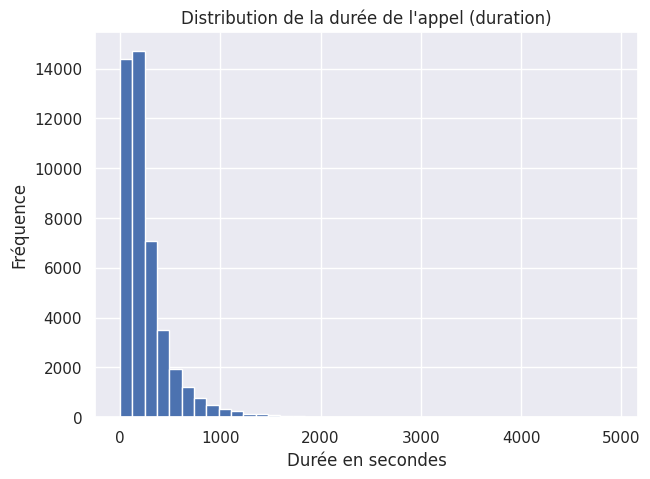

INTERPRÉTATION :

La variable *duration* est très importante : plus l'appel est long, 
plus la probabilité de souscription est grande. 
Cependant, cette variable n’est connue qu’APRÈS l’appel, 
donc elle ne peut pas être utilisée pour prédire avant l’appel.



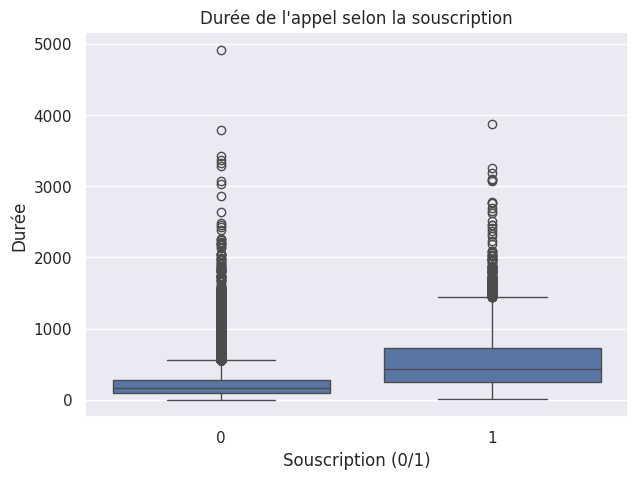

INTERPRÉTATION :

Les personnes qui souscrivent ont en général des appels plus longs. 
Cela confirme que la durée est la variable la plus influente du dataset.



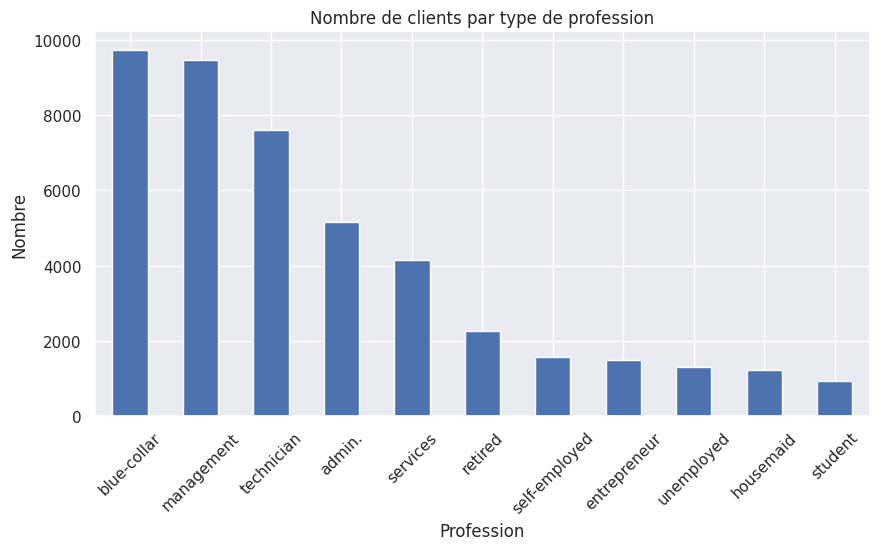

INTERPRÉTATION :

Les professions les plus fréquentes (management, blue-collar, technician) 
sont des segments clés du marketing bancaire.



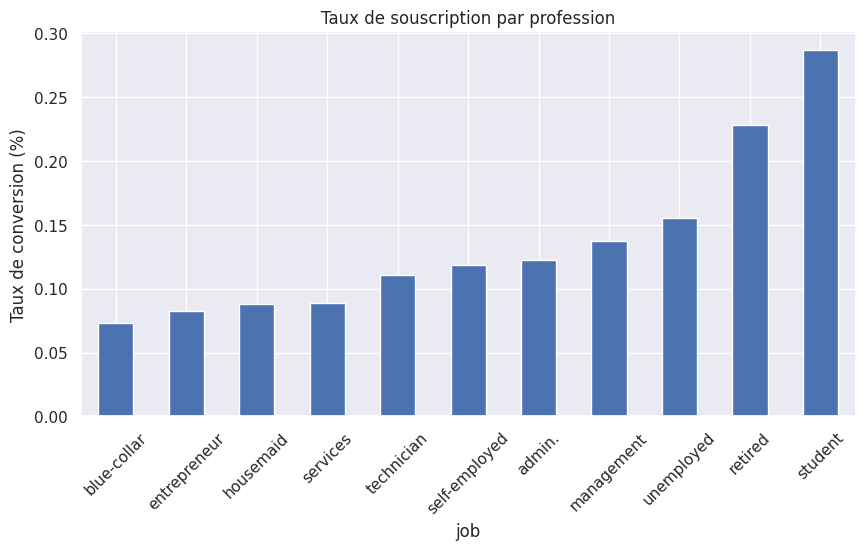

INTERPRÉTATION :

Certaines professions sont plus susceptibles de souscrire que d'autres. 
Cela aide à orienter des campagnes plus ciblées.


=== FIN DE L'ANALYSE ===


In [1]:
# ============================================================
# BANK MARKETING — Import via ucimlrepo + Graphiques + Analyse
# ============================================================

!pip install ucimlrepo >/dev/null 2>&1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

sns.set_theme()

# ============================================================
# 1) Importation du dataset
# ============================================================
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

df = pd.concat([X, y], axis=1)

print("===== APERÇU DU DATASET =====")
display(df.head())

print("\n===== MÉTADONNÉES =====")
print(bank_marketing.metadata)

print("\n===== INFORMATIONS SUR LES VARIABLES =====")
print(bank_marketing.variables)


# ============================================================
# 2) Nettoyage
# ============================================================

# y est souvent sous forme "yes"/"no" → convertir en binaire
df["y"] = df["y"].map({"yes": 1, "no": 0})

# Séparation numérique / catégorique
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns


# ============================================================
# 3) GRAPHIQUES + INTERPRÉTATIONS
# ============================================================

# -------------------------------
# A. Distribution de la cible (y)
# -------------------------------
plt.figure(figsize=(6,4))
df["y"].value_counts().plot(kind="bar")
plt.title("Distribution de la variable cible (y)")
plt.xlabel("Souscription (0 = non, 1 = oui)")
plt.ylabel("Nombre de clients")
plt.show()

print("INTERPRÉTATION :")
print("""
La variable cible est fortement déséquilibrée : la majorité des clients
NE souscrivent pas au dépôt à terme. Cela montre qu’il faut probablement
utiliser des techniques comme le rééquilibrage (SMOTE) ou class_weight.
""")


# -------------------------------------------------
# B. Histogramme de l’âge des clients
# -------------------------------------------------
plt.figure(figsize=(7,5))
plt.hist(df["age"], bins=30)
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

print("INTERPRÉTATION :")
print("""
La majorité des clients ont entre 25 et 60 ans. La distribution est légèrement
asymétrique vers la droite (présence de clients plus âgés).
Cela peut influencer la segmentation marketing.
""")


# -------------------------------------------------
# C. Boxplot de l'âge selon l'issue (y)
# -------------------------------------------------
plt.figure(figsize=(7,5))
sns.boxplot(x=df["y"], y=df["age"])
plt.title("Âge des clients selon la souscription")
plt.xlabel("Souscription (0/1)")
plt.ylabel("Âge")
plt.show()

print("INTERPRÉTATION :")
print("""
Ce boxplot montre les différences d’âge entre les clients qui souscrivent et
ceux qui ne souscrivent pas. Souvent, les personnes plus âgées ont un comportement
financier plus stable et peuvent être plus susceptibles de souscrire.
""")


# -------------------------------------------------
# D. Heatmap des corrélations (numériques)
# -------------------------------------------------
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

print("INTERPRÉTATION :")
print("""
La heatmap montre les relations linéaires entre les variables numériques.
Dans Bank Marketing, la corrélation est généralement faible, ce qui
signifie que les variables ne sont pas redondantes.
""")


# -------------------------------------------------
# E. Distribution d’une variable clé : durée de l'appel (duration)
# -------------------------------------------------
if "duration" in df.columns:
    plt.figure(figsize=(7,5))
    plt.hist(df["duration"], bins=40)
    plt.title("Distribution de la durée de l'appel (duration)")
    plt.xlabel("Durée en secondes")
    plt.ylabel("Fréquence")
    plt.show()

    print("INTERPRÉTATION :")
    print("""
La variable *duration* est très importante : plus l'appel est long,
plus la probabilité de souscription est grande.
Cependant, cette variable n’est connue qu’APRÈS l’appel,
donc elle ne peut pas être utilisée pour prédire avant l’appel.
""")


# -------------------------------------------------
# F. Relation duration vs y
# -------------------------------------------------
if "duration" in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=df["y"], y=df["duration"])
    plt.title("Durée de l'appel selon la souscription")
    plt.xlabel("Souscription (0/1)")
    plt.ylabel("Durée")
    plt.show()

    print("INTERPRÉTATION :")
    print("""
Les personnes qui souscrivent ont en général des appels plus longs.
Cela confirme que la durée est la variable la plus influente du dataset.
""")


# -------------------------------------------------
# G. Comptage des types de jobs
# -------------------------------------------------
if "job" in df.columns:
    plt.figure(figsize=(10,5))
    df["job"].value_counts().plot(kind="bar")
    plt.title("Nombre de clients par type de profession")
    plt.xlabel("Profession")
    plt.ylabel("Nombre")
    plt.xticks(rotation=45)
    plt.show()

    print("INTERPRÉTATION :")
    print("""
Les professions les plus fréquentes (management, blue-collar, technician)
sont des segments clés du marketing bancaire.
""")


# -------------------------------------------------
# H. Taux de souscription par profession
# -------------------------------------------------
if "job" in df.columns:
    plt.figure(figsize=(10,5))
    df.groupby("job")["y"].mean().sort_values().plot(kind="bar")
    plt.title("Taux de souscription par profession")
    plt.ylabel("Taux de conversion (%)")
    plt.xticks(rotation=45)
    plt.show()

    print("INTERPRÉTATION :")
    print("""
Certaines professions sont plus susceptibles de souscrire que d'autres.
Cela aide à orienter des campagnes plus ciblées.
""")


print("\n=== FIN DE L'ANALYSE ===")
